In [1]:
import os
import zipfile

# Unzipping the dataset
with zipfile.ZipFile("/content/videos.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/videos")

# Checking the content
os.listdir("/content/videos")


['__MACOSX', 'videos']

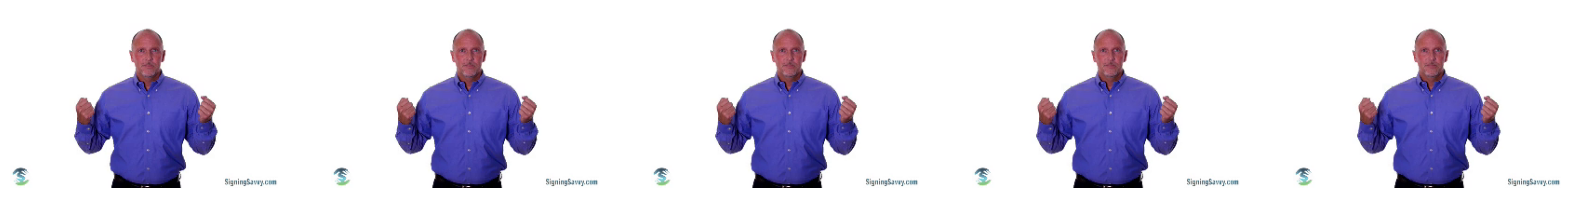

In [4]:
import cv2
from matplotlib import pyplot as plt

# Load a sample video
video_path = "/content/videos/videos/01377.mp4"  # Replace with an actual path from the dataset
cap = cv2.VideoCapture(video_path)

# Extract and display first 5 frames
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    ret, frame = cap.read()
    if ret:
        ax[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax[i].axis('off')

cap.release()


In [9]:
video_lengths = []
frame_rates = []
resolutions = []

for video_file in os.listdir("/content/videos/videos"):
    video_path = os.path.join("/content/videos/videos", video_file)
    cap = cv2.VideoCapture(video_path)

    # Length of video (in frames)
    video_lengths.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

    # Frame rate
    frame_rates.append(cap.get(cv2.CAP_PROP_FPS))

    # Resolution
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    resolutions.append((width, height))

    cap.release()

avg_length = sum(video_lengths) / len(video_lengths)
avg_frame_rate = sum(frame_rates) / len(frame_rates)
unique_resolutions = set(resolutions)


avg_length, avg_frame_rate, unique_resolutions


(27.93, 29.97059999999996, {(288, 192), (320, 240)})

In [10]:
import os

# Directory to store extracted frames
frame_dir = "/content/frames"
os.makedirs(frame_dir, exist_ok=True)

def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    video_name = os.path.basename(video_path).split('.')[0]
    os.makedirs(os.path.join(output_folder, video_name), exist_ok=True)

    frame_num = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_name = f"{video_name}_frame{frame_num}.png"
        frame_path = os.path.join(output_folder, video_name, frame_name)
        cv2.imwrite(frame_path, frame)
        frame_num += 1
    cap.release()

# Extract frames for all videos
for video_file in os.listdir("/content/videos/videos"):
    video_path = os.path.join("/content/videos/videos", video_file)
    extract_frames(video_path, frame_dir)


In [17]:
# Read the mapping from the text file using the correct delimiter
video_mapping = {}
with open("/content/wlasl_class_list.txt", 'r') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            video_num, action_name = parts
            video_mapping[video_num] = action_name
        else:
            print(f"Skipped line: {line.strip()}")


In [18]:
video_mapping

{'0': 'book',
 '1': 'drink',
 '2': 'computer',
 '3': 'before',
 '4': 'chair',
 '5': 'go',
 '6': 'clothes',
 '7': 'who',
 '8': 'candy',
 '9': 'cousin',
 '10': 'deaf',
 '11': 'fine',
 '12': 'help',
 '13': 'no',
 '14': 'thin',
 '15': 'walk',
 '16': 'year',
 '17': 'yes',
 '18': 'all',
 '19': 'black',
 '20': 'cool',
 '21': 'finish',
 '22': 'hot',
 '23': 'like',
 '24': 'many',
 '25': 'mother',
 '26': 'now',
 '27': 'orange',
 '28': 'table',
 '29': 'thanksgiving',
 '30': 'what',
 '31': 'woman',
 '32': 'bed',
 '33': 'blue',
 '34': 'bowling',
 '35': 'can',
 '36': 'dog',
 '37': 'family',
 '38': 'fish',
 '39': 'graduate',
 '40': 'hat',
 '41': 'hearing',
 '42': 'kiss',
 '43': 'language',
 '44': 'later',
 '45': 'man',
 '46': 'shirt',
 '47': 'study',
 '48': 'tall',
 '49': 'white',
 '50': 'wrong',
 '51': 'accident',
 '52': 'apple',
 '53': 'bird',
 '54': 'change',
 '55': 'color',
 '56': 'corn',
 '57': 'cow',
 '58': 'dance',
 '59': 'dark',
 '60': 'doctor',
 '61': 'eat',
 '62': 'enjoy',
 '63': 'forget',


In [19]:
labels = {}
for folder in os.listdir(frame_dir):
    video_name = folder.split('_')[0]  # Assuming the video number is the first part before '_'
    action = video_mapping.get(video_name, "Unknown")
    for frame_file in os.listdir(os.path.join(frame_dir, folder)):
        labels[frame_file] = action


In [30]:
import os

# 1. Listing all frame files
all_frames = [f for f in os.listdir('/content/frames') if f.endswith('.png')]

# 2. Labeling each frame using the modified function
frame_labels = {}
for frame_file in all_frames:
    frame_labels[frame_file] = label_frame(frame_file, video_mapping)


In [31]:
frame_labels

{}

In [32]:
def label_frame(filename, video_mapping):
    # Extract video number from filename
    video_num = filename.split('_')[0]

    # Return the label from video_mapping or 'Unknown' if not found
    return video_mapping.get(video_num, 'Unknown')

# Example usage:
frame_labels = {}
for frame_file in all_frames:
    frame_labels[frame_file] = label_frame(frame_file, video_mapping)


In [33]:
print(all_frames[:10])


[]


In [34]:
import os

video_dir_path = "/content/videos/videos"
video_files = [f for f in os.listdir(video_dir_path) if f.endswith('.mp4') or f.endswith('.avi')]
print(video_files[:10])  # printing first 10 video file names


['36249.mp4', '39747.mp4', '39592.mp4', '04772.mp4', '20201.mp4', '10343.mp4', '12860.mp4', '49483.mp4', '21328.mp4', '47985.mp4']


In [35]:
import cv2
import os

def extract_frames(video_path, output_dir):
    """Extracts frames from a given video and saves them in an output directory."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    cap = cv2.VideoCapture(video_path)
    frame_num = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_name = os.path.join(output_dir, f"frame{frame_num}.png")
        cv2.imwrite(frame_name, frame)
        frame_num += 1
    cap.release()

video_dir_path = "/content/videos/videos"
frame_dir_path = "/content/videos/frames"

for video_file in video_files:
    video_path = os.path.join(video_dir_path, video_file)
    output_dir = os.path.join(frame_dir_path, video_file.split('.')[0])
    extract_frames(video_path, output_dir)


In [ ]:
all_frames = {}

for video_dir in os.listdir(frame_dir_path):
    video_num = video_dir.split('_')[0]
    action_label = video_mapping.get(video_num, "Unknown")
    frame_files = [f for f in os.listdir(os.path.join(frame_dir_path, video_dir)) if f.endswith('.png')]
    for frame_file in frame_files:
        all_frames[frame_file] = action_label

# Checking the first few labels
for key in list(all_frames.keys())[:10]:
    print(f"{key}: {all_frames[key]}")


In [37]:
frame_dirs = os.listdir(frame_dir_path)
print(frame_dirs[:10])


['12860', '08924', '21570', '61563', '60360', '17724', '21212', '50620', '01557', '39555']


In [ ]:
for frame_dir in frame_dirs[:10]:
    video_num = frame_dir.split('_')[0]
    print(f"{frame_dir}: {video_mapping.get(video_num, 'Unknown')}")


In [ ]:
for frame_dir in frame_dirs[:10]:
    video_num = frame_dir.split('_')[0].lstrip('0')  # Remove leading zeros
    print(f"{frame_dir}: {video_mapping.get(video_num, 'Unknown')}")


In [40]:
frame_labels = {}
for frame_dir in frame_dirs:
    video_num = frame_dir.split('_')[0].lstrip('0')  # Remove leading zeros
    frame_labels[frame_dir] = video_mapping.get(video_num, 'Unknown')


In [ ]:
# Print the first 10 items in the frame_labels dictionary
for key, value in list(frame_labels.items())[:100]:
    print(f"{key}: {value}")


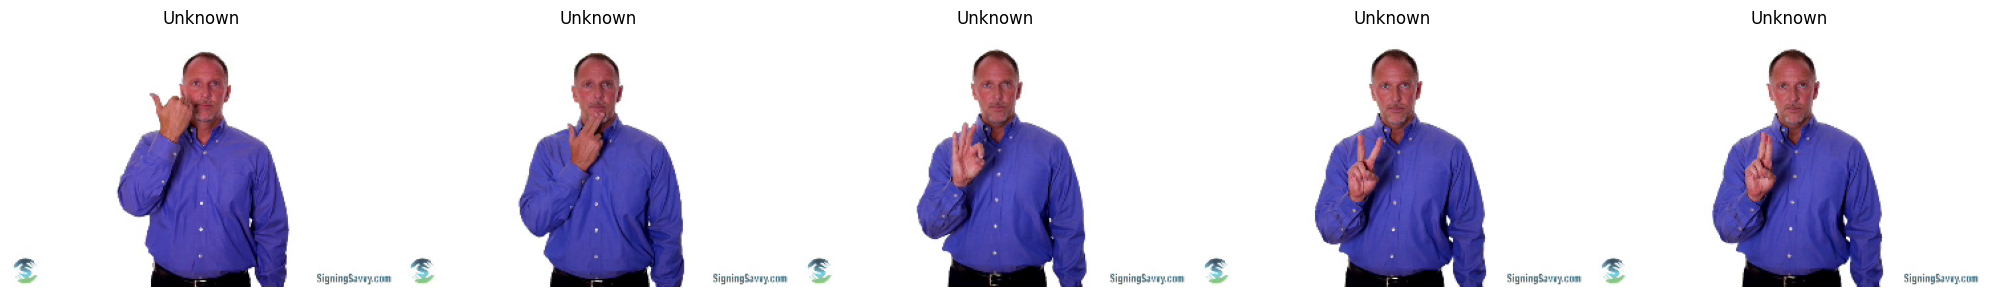

In [44]:
import matplotlib.pyplot as plt
import cv2

# Display a few random frames to get a sense of the data
sample_frames = list(frame_labels.keys())[:5]

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, frame in enumerate(sample_frames):
    image_path = os.path.join('/content/videos/frames', frame, 'frame1.png')
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].set_title(frame_labels[frame])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


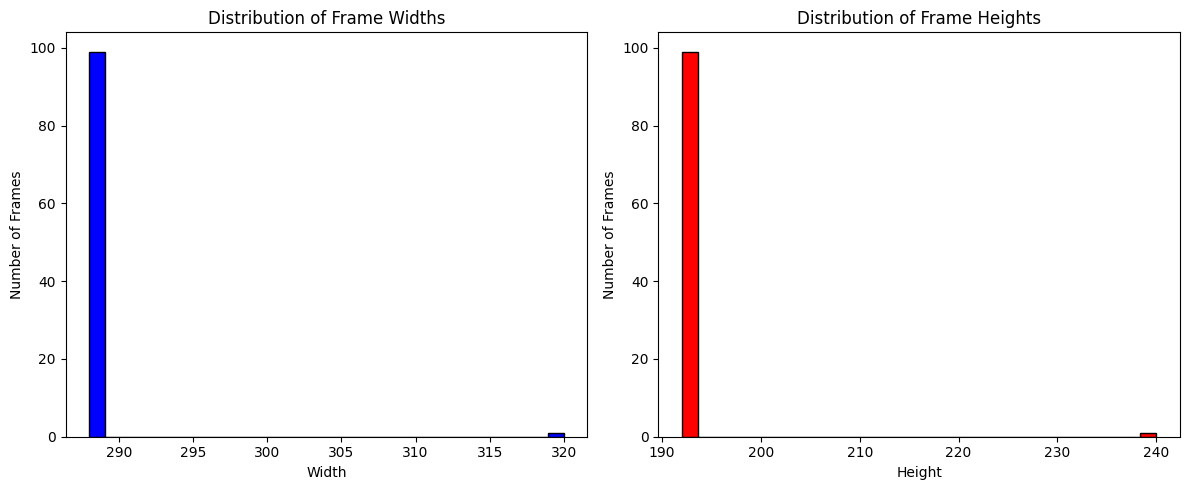

In [46]:
from numpy.lib.function_base import extract
frame_widths = []
frame_heights = []
extracted_frames_path = '/content/videos/frames'

for frame_dir in frame_dirs:
    image_path = os.path.join(extracted_frames_path, frame_dir, 'frame1.png')
    img = cv2.imread(image_path)
    h, w, _ = img.shape
    frame_widths.append(w)
    frame_heights.append(h)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(frame_widths, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Frame Widths')
plt.xlabel('Width')
plt.ylabel('Number of Frames')

plt.subplot(1, 2, 2)
plt.hist(frame_heights, bins=30, color='red', edgecolor='black')
plt.title('Distribution of Frame Heights')
plt.xlabel('Height')
plt.ylabel('Number of Frames')

plt.tight_layout()
plt.show()


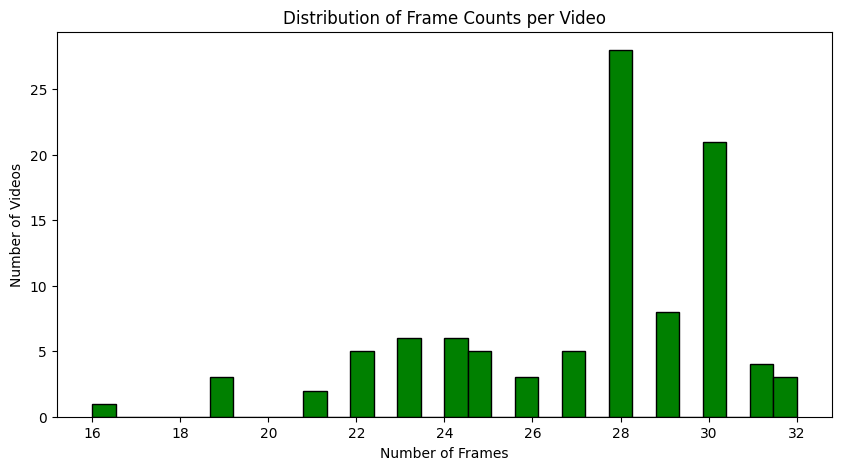

In [47]:
frame_counts = []

for frame_dir in frame_dirs:
    total_frames = len(os.listdir(os.path.join(extracted_frames_path, frame_dir)))
    frame_counts.append(total_frames)

plt.figure(figsize=(10, 5))
plt.hist(frame_counts, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Frame Counts per Video')
plt.xlabel('Number of Frames')
plt.ylabel('Number of Videos')
plt.show()


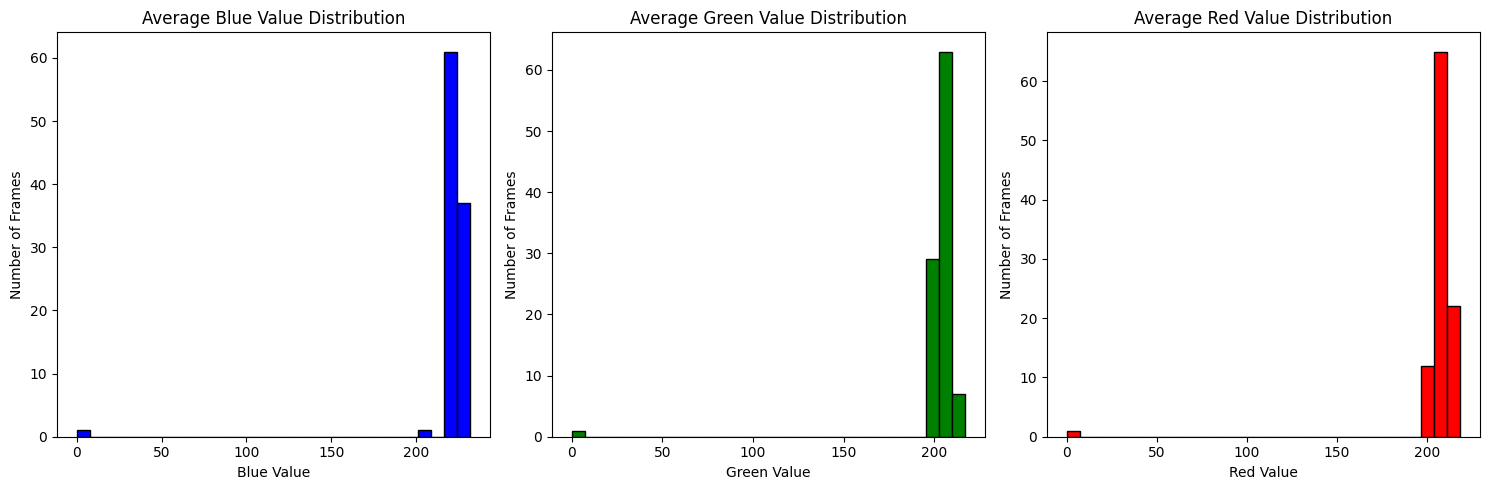

In [48]:
avg_colors = {'red': [], 'green': [], 'blue': []}

for frame_dir in frame_dirs:
    image_path = os.path.join(extracted_frames_path, frame_dir, 'frame1.png')
    img = cv2.imread(image_path)
    avg_blue = img[:, :, 0].mean()
    avg_green = img[:, :, 1].mean()
    avg_red = img[:, :, 2].mean()

    avg_colors['blue'].append(avg_blue)
    avg_colors['green'].append(avg_green)
    avg_colors['red'].append(avg_red)

plt.figure(figsize=(15, 5))

colors = ['blue', 'green', 'red']
for i, color in enumerate(colors, 1):
    plt.subplot(1, 3, i)
    plt.hist(avg_colors[color], bins=30, color=color, edgecolor='black')
    plt.title(f'Average {color.capitalize()} Value Distribution')
    plt.xlabel(f'{color.capitalize()} Value')
    plt.ylabel('Number of Frames')

plt.tight_layout()
plt.show()


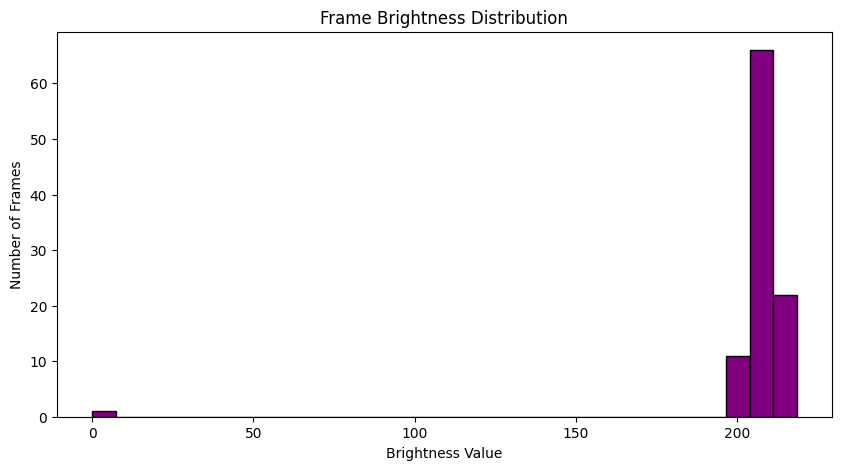

In [49]:
brightness = []

for frame_dir in frame_dirs:
    image_path = os.path.join(extracted_frames_path, frame_dir, 'frame1.png')
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    avg_brightness = img.mean()
    brightness.append(avg_brightness)

plt.figure(figsize=(10, 5))
plt.hist(brightness, bins=30, color='purple', edgecolor='black')
plt.title('Frame Brightness Distribution')
plt.xlabel('Brightness Value')
plt.ylabel('Number of Frames')
plt.show()


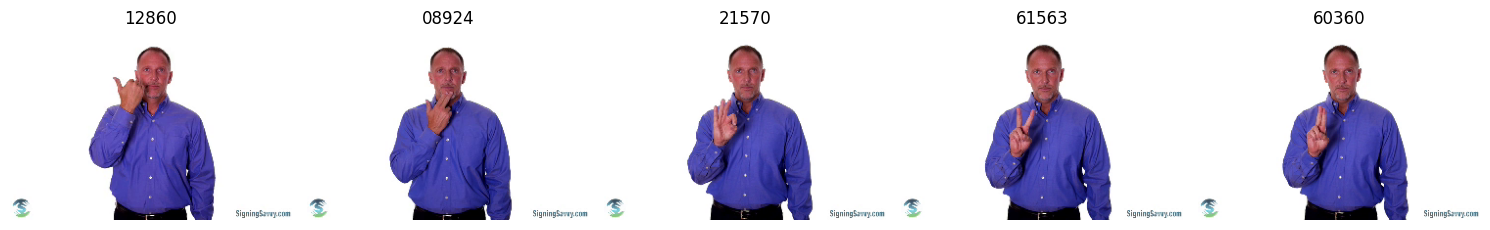

In [50]:
sample_frames = 5

plt.figure(figsize=(15, 5))

for i, frame_dir in enumerate(frame_dirs[:sample_frames], 1):
    image_path = os.path.join(extracted_frames_path, frame_dir, 'frame1.png')
    img = plt.imread(image_path)
    plt.subplot(1, sample_frames, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(frame_dir)

plt.tight_layout()
plt.show()


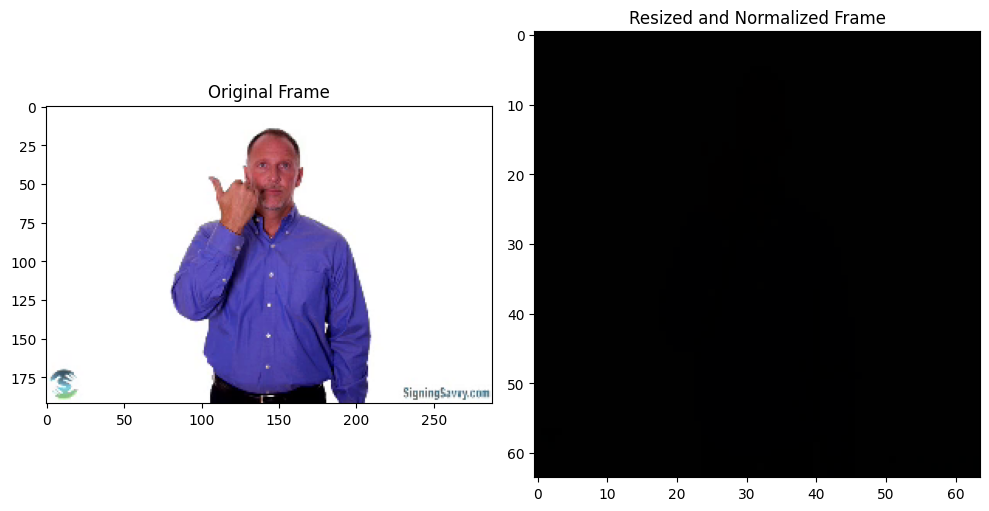

In [52]:
resize_dim = (64, 64)

sample_frame_path = os.path.join(extracted_frames_path, frame_dirs[0], 'frame1.png')
img = cv2.imread(sample_frame_path)
resized_img = cv2.resize(img, resize_dim)
normalized_img = resized_img / 255.0

# Convert the image to 8-bit unsigned integer format
normalized_img = cv2.convertScaleAbs(normalized_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB))
plt.title('Resized and Normalized Frame')
plt.tight_layout()
plt.show()

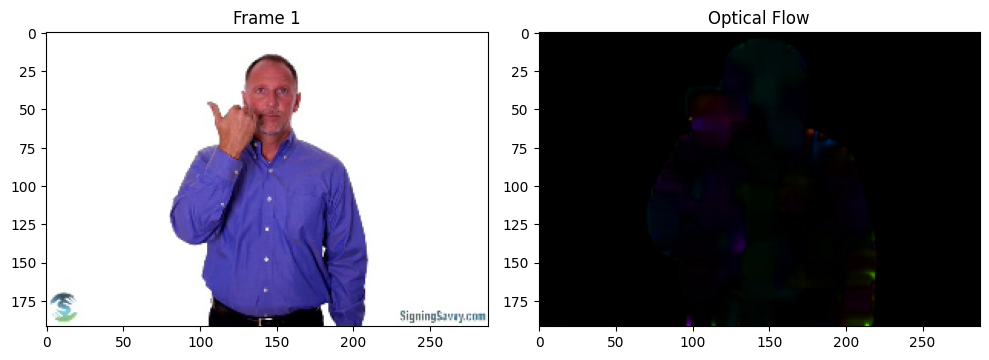

In [54]:
import numpy as np

# Compute Optical Flow using Farneback method
def compute_optical_flow(frame1, frame2):
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Convert flow to RGB for visualization
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return flow_rgb

sample_video_dir = os.path.join(extracted_frames_path, frame_dirs[0])
frame1_path = os.path.join(sample_video_dir, 'frame1.png')
frame2_path = os.path.join(sample_video_dir, 'frame2.png')

frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

flow_image = compute_optical_flow(frame1, frame2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(flow_image, cv2.COLOR_BGR2RGB))
plt.title('Optical Flow')
plt.tight_layout()
plt.show()


In [55]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load VGG16 model without top classification layers
model = VGG16(weights='imagenet', include_top=False)

def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = preprocess_input(img)
    features = model.predict(img.reshape(1, 224, 224, 3))
    return features

# Testing the feature extraction on a sample frame
features = extract_features(frame1_path)
print(f"Feature shape: {features.shape}")


1/1 [==============================] - 1s 861ms/step
Feature shape: (1, 7, 7, 512)
